In [1]:
HOMEPATH = "/home/ubuntu/fastai/"
DATAPATH = HOMEPATH + "data/Kaggle_digit_recognizer/"
print("HOMEPATH:", HOMEPATH)
print("DATAPATH:", DATAPATH)
import os

('HOMEPATH:', '/home/ubuntu/fastai/')
('DATAPATH:', '/home/ubuntu/fastai/data/Kaggle_digit_recognizer/')


In [2]:
os.chdir(HOMEPATH)
print ("os.getcwd:", os.getcwd())
import utils; reload(utils)
from utils import *

%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from __future__ import division, print_function

from keras.utils.np_utils import to_categorical

('os.getcwd:', '/home/ubuntu/fastai')


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)
Using Theano backend.


In [3]:
#Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive.
colNames = []
colDtypes = {}
colDtypes["label"] = np.int64

for i in range(784):
    colNames.append("pixel"+str(i))
    colDtypes["pixel"+str(i)] = np.int64
print (colNames[0:2] + colNames[-2:])
colNames = ['label'] + colNames
print (colNames[0:2] + colNames[-2:])


['pixel0', 'pixel1', 'pixel782', 'pixel783']
['label', 'pixel0', 'pixel782', 'pixel783']


In [4]:
df = pd.read_csv(DATAPATH+'train.csv', names=colNames, dtype=colDtypes, header=1)

In [5]:
type(df), df.shape
#785 columns = 1 + 28*28
#reshape into numy array with shape (4199, 1, 28,28)

(pandas.core.frame.DataFrame, (41999, 785))

In [6]:
df.head(2)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
uniques = list(df.label.unique())
uniques.sort()
uniques

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
pixelData = df.as_matrix()[:,1:]
print ("pixelData.shape:", pixelData.shape)
labelData = df.as_matrix()[:,0]
print ("labelData.shape:", labelData.shape, labelData[0:10])


pixelData.shape: (41999, 784)
labelData.shape: (41999,) [0 1 4 0 0 7 3 5 3 8]


In [9]:
pixelData = pixelData.reshape((41999, 28, 28))
print ("pixelData.shape:", pixelData.shape)

pixelData.shape: (41999, 28, 28)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(pixelData, labelData, test_size=0.1, random_state=42)#split was 0.33

In [11]:
print ("X_train:", X_train.shape)
print ("X_test:", X_test.shape)
print ("y_train:", y_train.shape)
print ("y_test:", y_test.shape)

X_train: (37799, 28, 28)
X_test: (4200, 28, 28)
y_train: (37799,)
y_test: (4200,)


In [12]:
if len(X_test.shape)==3:
    print("expand shape")
    X_test = np.expand_dims(X_test,1)
    X_train = np.expand_dims(X_train,1)
else:
        print("expand shape already done, don't do again.")

print ("type(X_test):", type(X_test), X_test.shape)
print ("type(X_train):", type(X_train), X_train.shape)

expand shape
type(X_test): <type 'numpy.ndarray'> (4200, 1, 28, 28)
type(X_train): <type 'numpy.ndarray'> (37799, 1, 28, 28)


In [13]:
print ("X_train:", X_train.shape)
print ("X_test:", X_test.shape)


X_train: (37799, 1, 28, 28)
X_test: (4200, 1, 28, 28)


In [14]:
print ("type(y_train):", type(y_train), y_train.shape, len(y_train.shape))
print ("type(y_test):", type(y_test), y_test.shape, len(y_test.shape))

type(y_train): <type 'numpy.ndarray'> (37799,) 1
type(y_test): <type 'numpy.ndarray'> (4200,) 1


In [15]:
if len(y_test.shape)==1:
    y_train = to_categorical(y_train)
else:
    print ("y_train already onehot'd, dont try again.")

if len(y_test.shape)==1:
    y_test = to_categorical(y_test)
else:
    print ("y_train already onehot'd, dont try again.")

print ("type(y_train):", type(y_train), y_train.shape)
print ("type(y_test):", type(y_test), y_test.shape)

type(y_train): <type 'numpy.ndarray'> (37799, 10)
type(y_test): <type 'numpy.ndarray'> (4200, 10)


In [16]:
print ("y_train\n", y_train[0:5, :])
print ("y_test\n", y_test[0:5, :])

y_train
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]
y_test
 [[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [17]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

In [18]:
def plot_history(histories):
    #histories : list of history objects. nb: history.history dictionary structure
    print ("len(histories):", len(histories))
    if len(histories)==1: 
        history = histories
    else:
        #create empty history to copy into
        history = {}
        for i in histories[0].history.keys():
            history[i] = []
        #now combine all history[key] lists into one history[key] list.
        for hist in histories:
            for key in history.keys():
                history[key] += hist.history[key]
                #print (key, len(hist.history[key]), len(history[key]))

    # list all data in history
    print(history.keys(), len(history[history.keys()[0]]))
    for key in history.keys():
        print (key, ":", history[key][-1])

    # summarize history for accuracy
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')
    plt.show()

In [19]:
gen = image.ImageDataGenerator()
#recall: (X_train, y_train), (X_test, y_test) = mnist.load_data()
batches = gen.flow(X_train, y_train, batch_size=64)
test_batches = gen.flow(X_test, y_test, batch_size=64)

In [20]:
def norm_input(x): return (x-mean_px)/std_px

In [21]:
os.chdir(HOMEPATH)
print ("os.getcwd:", os.getcwd())
import vgg16bn

os.getcwd: /home/ubuntu/fastai


In [50]:
def get_model_bn_do():
    model = Sequential([
        Lambda(norm_input, input_shape=(1,28,28)),

        #ConvBlock(2, 64) = 2 sets of layers with Convolution2D.filters=64
        ZeroPadding2D((1, 1)),
        Convolution2D(64, 3, 3, activation='relu'),
        ZeroPadding2D((1, 1)),
        Convolution2D(64, 3, 3, activation='relu'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        #ConvBlock(2, 128) = 2 sets of layers with Convolution2D.filters=64
        ZeroPadding2D((1, 1)),
        Convolution2D(128, 3, 3, activation='relu'),
        ZeroPadding2D((1, 1)),
        Convolution2D(128, 3, 3, activation='relu'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        #ConvBlock(3, 256) = 3 sets of layers with Convolution2D.filters=256
        ZeroPadding2D((1, 1)),
        Convolution2D(256, 3, 3, activation='relu'),
        ZeroPadding2D((1, 1)),
        Convolution2D(256, 3, 3, activation='relu'),
        ZeroPadding2D((1, 1)),
        Convolution2D(256, 3, 3, activation='relu'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        #ConvBlock(3, 512) = 3 sets of layers with Convolution2D.filters=512
        ZeroPadding2D((1, 1)),
        Convolution2D(512, 3, 3, activation='relu'),
        ZeroPadding2D((1, 1)),
        Convolution2D(512, 3, 3, activation='relu'),
        ZeroPadding2D((1, 1)),
        Convolution2D(512, 3, 3, activation='relu'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        #NB: for some weird reason, if a second block of ConvBlock(3, 512) is attempted, errors result.
        Flatten(),
        
        #FCBlock
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        #FCBlock
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(10, activation='softmax')#last dense layer - 10 categories for 10 digits.

        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [51]:
from keras import backend as K
K.set_image_dim_ordering('th')

get_model_bn_do().summary()

/usr/local/lib/python2.7/dist-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_15 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1, 28, 28)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_15 (Lambda)               (None, 1, 28, 28)     0           lambda_input_15[0][0]            
____________________________________________________________________________________________________
zeropadding2d_112 (ZeroPadding2D (None, 1, 30, 30)     0           lambda_15[0][0]                  
____________________________________________________________________________________________________
convolution2d_116 (Convolution2D (None, 64, 28, 28)    640         zeropadding2d_112[0][0]          
____________________________________________________________________________________________________
zeropadding2d_113 (ZeroPadding2D (None, 64, 30, 30)    0           convolution2d_116[0][0]          
___________________________________________________________________________________________

In [ ]:
#Batchnormalisation : uses batches and test_batches created from image.ImageDataGenerator.flow(blah...)

def get_model_bn_do_suspended():
    model = Sequential([
        Lambda(norm_input, input_shape=(1,28,28)),
        Convolution2D(32,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,3,3, activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dropout(0.5),#added dropout here since it appears overtraining & validation not converging.
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [52]:
def fit_model():
    model = get_model_bn_do()
    model.summary()
    print ("model.optimizer.lr:", model.optimizer.lr)
    history1 = model.fit_generator(batches, batches.n, nb_epoch=1, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.n)
    print("model.fit_generator(..) completed with model.optimizer.lr:", model.optimizer.lr)
    model.optimizer.lr=0.1
    history2 = model.fit_generator(batches, batches.n, nb_epoch=4, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.n)
    print("model.fit_generator(..) completed with model.optimizer.lr:=0.1", model.optimizer.lr)
    plot_history([history1, history2])
    model.optimizer.lr=0.01
    history3 = model.fit_generator(batches, batches.n, nb_epoch=12, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.n)
    print("model.fit_generator(..) completed with model.optimizer.lr:0.01", model.optimizer.lr)
    plot_history([history1, history2, history3])
    model.optimizer.lr=0.001
    history4 = model.fit_generator(batches, batches.n, nb_epoch=18, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.n)
    print("model.fit_generator(..) completed with model.optimizer.lr:0.001", model.optimizer.lr)
    plot_history([history1, history2, history3, history4])
    model.optimizer.lr=0.0001
    history5 = model.fit_generator(batches, batches.n, nb_epoch=27, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.n)
    print("model.fit_generator(..) completed with model.optimizer.lr:0.0001", model.optimizer.lr)
    plot_history([history1, history2, history3, history4, history5])
    return model
#todo: fix output 'model.optimizer.lr' printing object type not printing value

/usr/local/lib/python2.7/dist-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_16 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1, 28, 28)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_16 (Lambda)               (None, 1, 28, 28)     0           lambda_input_16[0][0]            
____________________________________________________________________________________________________
zeropadding2d_122 (ZeroPadding2D (None, 1, 30, 30)     0           lambda_16[0][0]                  
____________________________________________________________________________________________________
convolution2d_126 (Convolution2D (None, 64, 28, 28)    640         zeropadding2d_122[0][0]          
____________________________________________________________________________________________________
zeropadding2d_123 (ZeroPadding2D (None, 64, 30, 30)    0           convolution2d_126[0][0]          
___________________________________________________________________________________________

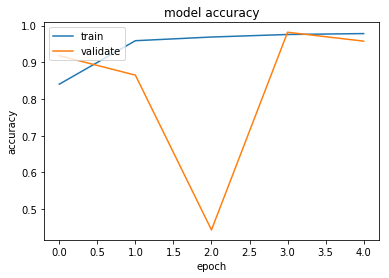

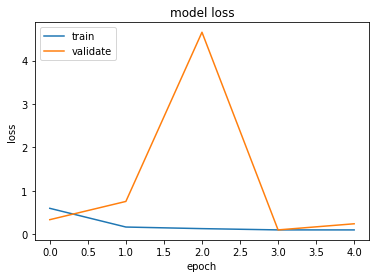

model.fit_generator(..) completed with model.optimizer.lr: 0.01
len(histories): 3
['acc', 'loss', 'val_acc', 'val_loss'] 17
acc : 0.993677081406
loss : 0.0305930827976
val_acc : 0.982857142971
val_loss : 0.127194448885


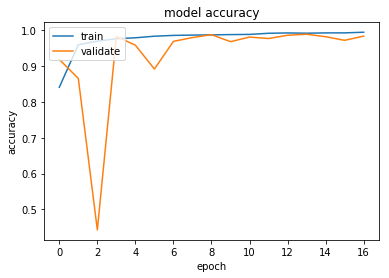

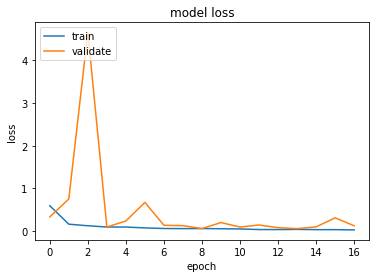

model.fit_generator(..) completed with model.optimizer.lr: 0.001
len(histories): 4
['acc', 'loss', 'val_acc', 'val_loss'] 35
acc : 0.997936453345
loss : 0.0105594580241
val_acc : 0.988333333333
val_loss : 0.106461185165


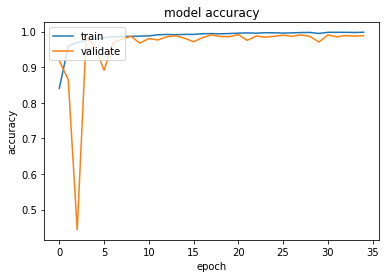

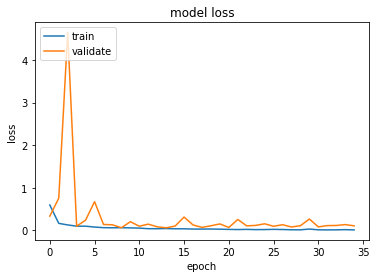

model.fit_generator(..) completed with model.optimizer.lr: 0.0001
len(histories): 5
['acc', 'loss', 'val_acc', 'val_loss'] 62
acc : 0.997962909072
loss : 0.0123515946644
val_acc : 0.992142857143
val_loss : 0.0795871829959


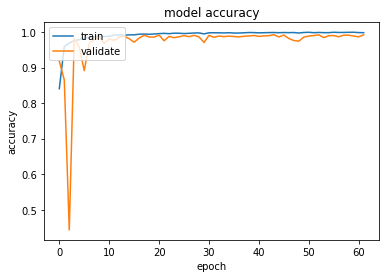

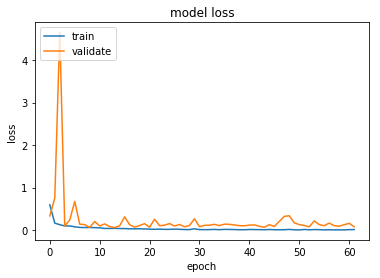

/usr/local/lib/python2.7/dist-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_17 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1, 28, 28)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_17 (Lambda)               (None, 1, 28, 28)     0           lambda_input_17[0][0]            
____________________________________________________________________________________________________
zeropadding2d_132 (ZeroPadding2D (None, 1, 30, 30)     0           lambda_17[0][0]                  
____________________________________________________________________________________________________
convolution2d_136 (Convolution2D (None, 64, 28, 28)    640         zeropadding2d_132[0][0]          
____________________________________________________________________________________________________
zeropadding2d_133 (ZeroPadding2D (None, 64, 30, 30)    0           convolution2d_136[0][0]          
___________________________________________________________________________________________

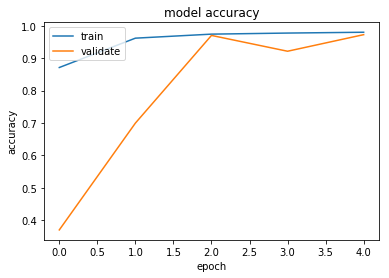

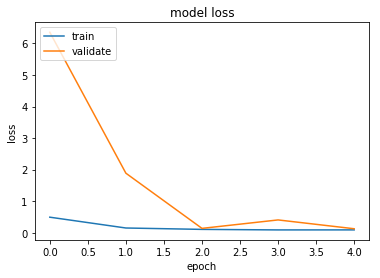

model.fit_generator(..) completed with model.optimizer.lr: 0.01
len(histories): 3
['acc', 'loss', 'val_acc', 'val_loss'] 17
acc : 0.993941638669
loss : 0.0300066995141
val_acc : 0.988809524037
val_loss : 0.106686315198


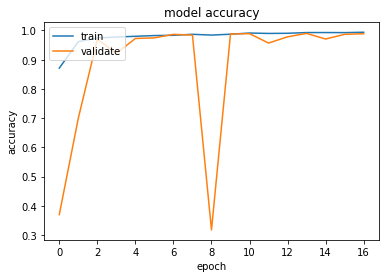

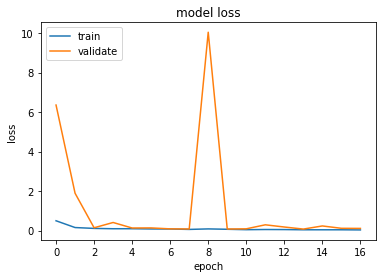

In [ ]:
models = [fit_model() for i in range(6)]

In [ ]:
model_path = DATAPATH + 'models/'

In [ ]:
print ("models:", type(models), len(models))

In [ ]:
for i,m in enumerate(models):
    m.save_weights(model_path+'cnn-mnist23-'+str(i)+'_vgg16bn_simulation.h5')#nb: why .pkl instead of .h5? .pkl usually for pickle.

In [ ]:
evals = np.array([m.evaluate(X_test, y_test, batch_size=256) for m in models])

In [ ]:
evals_mean = evals.mean(axis=0)

In [ ]:
print ("evals_mean:", evals_mean.shape)

In [ ]:
print (evals_mean)

In [ ]:
all_preds = np.stack([m.predict(X_test, batch_size=256) for m in models])

In [ ]:
all_preds.shape

In [ ]:
avg_preds = all_preds.mean(axis=0)

In [ ]:
avg_preds.shape

In [ ]:
keras.metrics.categorical_accuracy(y_test, avg_preds).eval()

In [ ]:
#start loading test data
#Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive.
colNames = []
colDtypes = {}

for i in range(784):
    colNames.append("pixel"+str(i))
    colDtypes["pixel"+str(i)] = np.int64
print (colNames[0:2] + colNames[-2:])
colNames = colNames
print (colNames[0:2] + colNames[-2:])


In [ ]:
df_test = pd.read_csv(DATAPATH+'test.csv', names=colNames, dtype=colDtypes, header=0)

In [ ]:
df_test.shape

In [ ]:
test_pixelData = df_test.as_matrix()
print ("test_pixelData.shape:", test_pixelData.shape, test_pixelData.shape[0])


In [ ]:
X_test = test_pixelData.reshape((test_pixelData.shape[0], 28, 28))
print ("X_test.shape:", X_test.shape)

In [ ]:
if len(X_test.shape)==3:
    print("expand shape")
    X_test = np.expand_dims(X_test,1)
else:
        print("expand shape already done, don't do again.")

print ("type(X_test):", type(X_test), X_test.shape)


In [ ]:
all_preds = np.stack([m.predict(X_test, batch_size=256) for m in models])

In [ ]:
all_preds.shape

In [ ]:
avg_preds = all_preds.mean(axis=0)

In [ ]:
avg_preds.shape

In [ ]:
print(avg_preds[0])
print(type(avg_preds[0]))
print(type(list(avg_preds[0])))


In [ ]:
category = []
for i in range(avg_preds.shape[0]):
    category.append(np.argmax(avg_preds[i]))
    #print(i, category, avg_preds[i])
    #break
type(category), len(category), category[0:10]

In [ ]:
imageids = list(range(1, avg_preds.shape[0]+1))
print (type(imageids), len(imageids), imageids[0:5], imageids[-5:])

In [ ]:
#create dataframe, write to csv
#dataframe labels = ImageId,Label
#df = pd.read_csv(DATAPATH+'train.csv', names=colNames, dtype=colDtypes, header=1)


df = pd.DataFrame({'ImageId': imageids, 'Label': category})#, index=index, columns=['ImageId','Label'])
print (df.shape)
print (df.head())
print (df.tail())

In [ ]:
df.to_csv(DATAPATH+'submit_2.csv', index=False)